# Оценка качества моделей машинного обучения

- Предположим, что мы построили несколько моделей машинного обучения.
- Как понять, какая из этих моделей лучше предсказывает результаты?
- Для этого используются различные метрики качества моделей машинного обучения.
- Мы будем говорить только о метриках качества для задач обучения с учителем: классификации и регресии.
- [Страница по оценке качества моделей в scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Изучение качества классификации

### Подготовка данных и построение базовых моделей для оценки

In [2]:
# https://scikit-learn.org/stable/datasets/index.html#iris-dataset
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
np.unique(iris.target)

array([0, 1, 2])

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [9]:
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

### Разделение выборки на обучающую и тестовую

Для разделения выборки на обучающую и тестовую используется функция [train_test_split.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [10]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=1)

Как правило, параметр test_size устанавливают в 20% или 30%. Здесь используется test_size=0.5 (50%) чтобы искусственно "ухудшить" результат на хорошем наборе данных и показать различные возможности использования метрик качества.

Параметр random_state позволяет задавать базовое значение для генератора случайных чисел. Это делает разбиение неслучайным. Если задается параметр random_state то результаты разбиения будут одинаковыми при различных запусках. На практике этот параметр удобно использовать для создания "устойчивых" учебных примеров, которые выдают одинаковый результат при различных запусках.

In [11]:
# Размер обучающей выборки
iris_X_train.shape, iris_y_train.shape

((75, 4), (75,))

In [12]:
# Размер тестовой выборки
iris_X_test.shape, iris_y_test.shape

((75, 4), (75,))

Функция train_test_split разделила исходную выборку таким образом, чтобы в обучающей и тестовой частях сохранились пропорции классов.

In [13]:
np.unique(iris_y_train)

array([0, 1, 2])

In [14]:
np.unique(iris_y_test)

array([0, 1, 2])

In [15]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [16]:
# Для обучающей выборки
print_class_proportions(iris_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 26 	 	 34.67%
1 	 26 	 	 34.67%
2 	 23 	 	 30.67%


In [17]:
# Для тестовой выборки
print_class_proportions(iris_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 24 	 	 32.0%
1 	 24 	 	 32.0%
2 	 27 	 	 36.0%


#### Построим базовые модели на основе метода ближайших соседей 

In [18]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(iris_X_train, iris_y_train)
target1_1 = cl1_1.predict(iris_X_test)
target1_1

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 2, 1, 1, 2, 1, 0, 1])

In [19]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(iris_X_train, iris_y_train)
target1_2 = cl1_2.predict(iris_X_test)
target1_2

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 1, 1, 2, 2, 0, 1])

Как понять какая модель дает лучшее качество предсказания?

## Метрики качества классификации

### [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

Метрика вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов. 

Эту метрику обычно переводят как "точность", но перевод не является удачным, потому что совпадает с другой метрикой - "precision".

Чтобы не сталкиваться с неточностями перевода, названия метрик можно не переводить. 

In [20]:
# iris_y_test - эталонное значение классов из исходной (тестовой) выборки
# target* - предсказанное значение классов

# 2 ближайших соседа
accuracy_score(iris_y_test, target1_1)

0.92

In [21]:
# 10 ближайших соседей
accuracy_score(iris_y_test, target1_2)

0.9733333333333334

Точность в случае 10 ближайших соседей составляет более 97%, а точность в случае 2 ближайших соседей составляет 92%.

Метрика "Accuracy" показывает точность по всем классам, но точность **может быть различной для различных классов**.

Это **очень серьезная проблема**, которая часто возникает на несбалансированных выборках.

In [22]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [23]:
# 2 ближайших соседа
print_accuracy_score_for_classes(iris_y_test, target1_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.7777777777777778


Accuracy для классов 0 и 1 составляет 100%, но для класса 2 только 78%.

In [24]:
# 10 ближайших соседей
print_accuracy_score_for_classes(iris_y_test, target1_2)

Метка 	 Accuracy
0 	 1.0
1 	 0.9583333333333334
2 	 0.9629629629629629


Accuracy для класса 0 составляет 100%, но для классов 2 и 3 около 95-96%.

В случае дисбаланса классов **только для бинарной классификации** рекомендуется использовать метрику [balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score). Но при этом все равно стоит следить за точностью на отдельных классах.

In [25]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [26]:
# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_iris_y_test = convert_target_to_binary(iris_y_test, 2)
list(zip(iris_y_test, bin_iris_y_test))

[(0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0),
 (2, 1),
 (0, 0),
 (0, 0),
 (2, 1),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (2, 1),
 (1, 0),
 (2, 1),
 (1, 0),
 (2, 1),
 (2, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (2, 1),
 (2, 1),
 (0, 0),
 (2, 1),
 (2, 1),
 (1, 0),
 (2, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (2, 1),
 (2, 1),
 (2, 1),
 (2, 1),
 (2, 1),
 (1, 0),
 (2, 1),
 (1, 0),
 (0, 0),
 (2, 1),
 (2, 1),
 (0, 0),
 (0, 0),
 (2, 1),
 (0, 0),
 (2, 1),
 (2, 1),
 (1, 0),
 (1, 0),
 (2, 1),
 (2, 1),
 (0, 0),
 (1, 0)]

In [27]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)

In [28]:
balanced_accuracy_score(bin_iris_y_test, bin_target1_1)

0.8888888888888888

In [29]:
balanced_accuracy_score(bin_iris_y_test, bin_target1_2)

0.9710648148148148

### Матрица ошибок или [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

Количество верно и ошибочно классифицированных данных, представленное в виде матрицы.

Идея показателей представлена в виде следующего рисунка:

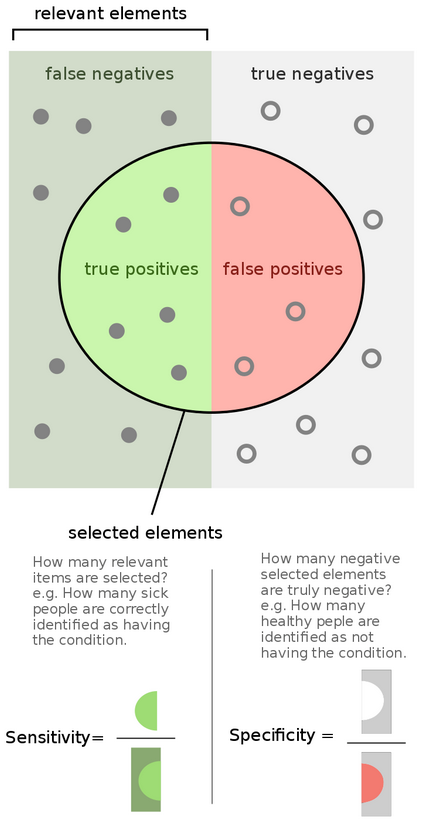

In [30]:
from IPython.display import Image
Image("img/sensitivity.png")

Рассмотрим случай бинарной классификации.

Будем использовать следующие обозначения:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- True Positive (TP) - количество верно предсказанных значений 1 класса
- False Positive (FP) - количество неверно предсказанных значений 1 класса (предсказана 1 но истинное значение 0) - ошибка I рода.
- True Negative (TN) - количество верно предсказанных значений 0 класса
- False Negative (FN) - количество неверно предсказанных значений 0 класса (предсказан 0 но истинное значение 1) - ошибка II рода.

В случае бинарной классификации матрица ошибок выглядит следующим образом:

| Предсказанное/истинное значение | $y=1$ | $y=0$ |
| --- | --- | --- |
| $\hat{y}=1$ | True Positive (TP) | False Positive (FP) |
| $\hat{y}=0$ | False Negative (FN) | True Negative (TN) |

Для построения матрицы будем использовать функцию [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) из библиотеки scikit-learn.

Функция confusion_matrix выводит строки и столбцы таблицы в другом порядке:

| Истинное/предсказанное значение | $\hat{y}=0$ | $\hat{y}=1$ |
| --- | --- | --- |
| $y=0$ | True Negative (TN) | False Positive (FP) |
| $y=1$ | False Negative (FN) | True Positive (TP) |


In [31]:
confusion_matrix(bin_iris_y_test, bin_target1_1, labels=[0, 1])

array([[48,  0],
       [ 6, 21]], dtype=int64)

In [32]:
tn, fp, fn, tp = confusion_matrix(bin_iris_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(48, 0, 6, 21)

In [33]:
# Пример для небинарной классификации
confusion_matrix(iris_y_test, target1_1, labels=[0, 1, 2])

array([[24,  0,  0],
       [ 0, 24,  0],
       [ 0,  6, 21]], dtype=int64)

In [34]:
# Вывод матрицы ошибок в графическом виде
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


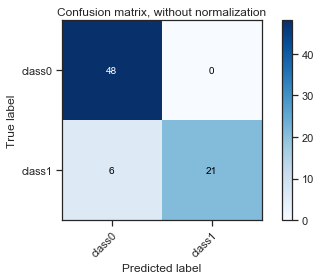

In [35]:
plot_confusion_matrix(bin_iris_y_test, bin_target1_1, 
                      classes=np.array(['class0', 'class1']),
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


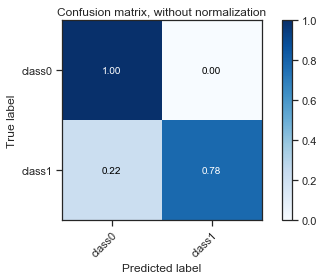

In [36]:
# Нормализованная матрица ошибок (значения в долях от 0 до 1)
plot_confusion_matrix(bin_iris_y_test, bin_target1_1, 
                      classes=np.array(['class0', 'class1']),
                      normalize=True,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization


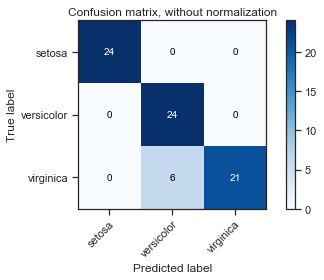

In [37]:
# Матрица ошибок для трех классов
# Для 2 ближайших соседей
plot_confusion_matrix(iris_y_test, target1_1, 
                      classes=iris.target_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


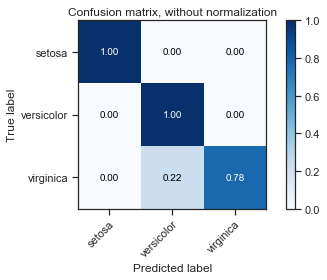

In [38]:
# нормализованный вариант
plot_confusion_matrix(iris_y_test, target1_1, 
                      classes=iris.target_names,
                      normalize=True,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization


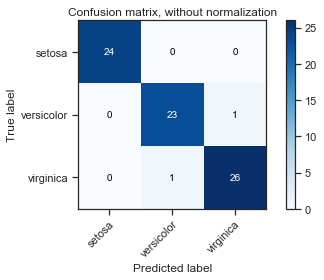

In [39]:
# Матрица ошибок для трех классов
# Для 10 ближайших соседей
plot_confusion_matrix(iris_y_test, target1_2, 
                      classes=iris.target_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


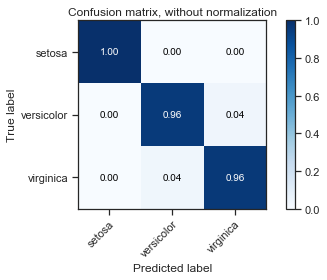

In [40]:
# нормализованный вариант
plot_confusion_matrix(iris_y_test, target1_2, 
                      classes=iris.target_names,
                      normalize=True,
                      title='Confusion matrix, without normalization')

### Precision, recall и F-мера

В случае бинарной классификации матрица ошибок выглядит следующим образом:

| Предсказанное/истинное значение | $y=1$ | $y=0$ |
| --- | --- | --- |
| $\hat{y}=1$ | True Positive (TP) | False Positive (FP) |
| $\hat{y}=0$ | False Negative (FN) | True Negative (TN) |

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика accuracy:

Уже знакомая метрика accuracy может быть записана с помощью следующей формулы:

$accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

Доля верно предсказанных классификатором положительных и отрицательных объектов.

In [41]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 2 ближайших соседей
precision_score(bin_iris_y_test, bin_target1_1), recall_score(bin_iris_y_test, bin_target1_1)

(1.0, 0.7777777777777778)

In [42]:
# Для 10 ближайших соседей
precision_score(bin_iris_y_test, bin_target1_2), recall_score(bin_iris_y_test, bin_target1_2)

(0.9629629629629629, 0.9629629629629629)

Параметр average (уровень детализации метрик) описан в документации к функциям. Рассмотрим данный параметр на примере 

In [43]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(iris_y_test, target1_1, average='micro')

0.92

In [44]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(iris_y_test, target1_1, average='macro')

0.9333333333333332

In [45]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(iris_y_test, target1_1, average='weighted')

0.936

#### F-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

Для обощенного случая используется [fbeta_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score)

Параметр average используется как в случае с precision и recall.

In [46]:
f1_score(bin_iris_y_test, bin_target1_2)

0.9629629629629629

In [47]:
f1_score(iris_y_test, target1_1, average='micro')

0.92

In [48]:
f1_score(iris_y_test, target1_1, average='macro')

0.9212962962962963

In [49]:
f1_score(iris_y_test, target1_1, average='weighted')

0.9194444444444446

Функция [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) позволяет выводить значения точности, полноты и F-меры для всех классов выборки.

In [50]:
classification_report(iris_y_test, target1_1, target_names=iris.target_names)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        24\n  versicolor       0.80      1.00      0.89        24\n   virginica       1.00      0.78      0.88        27\n\n   micro avg       0.92      0.92      0.92        75\n   macro avg       0.93      0.93      0.92        75\nweighted avg       0.94      0.92      0.92        75\n'

In [51]:
classification_report(iris_y_test, target1_1, 
                      target_names=iris.target_names, output_dict=True)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24},
 'versicolor': {'precision': 0.8,
  'recall': 1.0,
  'f1-score': 0.888888888888889,
  'support': 24},
 'virginica': {'precision': 1.0,
  'recall': 0.7777777777777778,
  'f1-score': 0.8750000000000001,
  'support': 27},
 'micro avg': {'precision': 0.92,
  'recall': 0.92,
  'f1-score': 0.92,
  'support': 75},
 'macro avg': {'precision': 0.9333333333333332,
  'recall': 0.9259259259259259,
  'f1-score': 0.9212962962962963,
  'support': 75},
 'weighted avg': {'precision': 0.936,
  'recall': 0.92,
  'f1-score': 0.9194444444444446,
  'support': 75}}

### ROC-кривая и ROC AUC

Используется для оценки качества бинарной классификации.

[Детальная статья в википедии.](https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

Для получения точек графика используется функция [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve).

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

In [52]:
fpr, tpr, thresholds = roc_curve(bin_iris_y_test, bin_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0., 0., 1.]),
 array([0.        , 0.77777778, 1.        ]),
 array([2, 1, 0]))

In [53]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

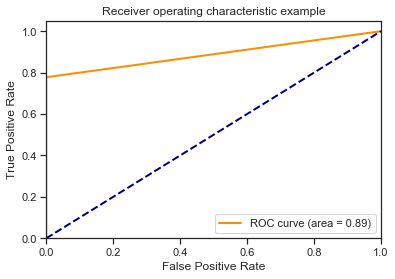

In [54]:
# Для 2 ближайших соседей
draw_roc_curve(bin_iris_y_test, bin_target1_1, pos_label=1, average='micro')

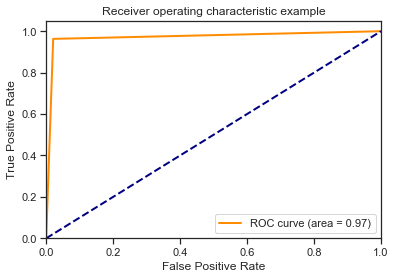

In [55]:
# Для 10 ближайших соседей
draw_roc_curve(bin_iris_y_test, bin_target1_2, pos_label=1, average='micro')

### Кривая precision-recall

Аналогично ROC-кривой также можно строить кривую precision-recall.

Детальный пример [из библиотеки.](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

## Изучение качества регрессии

### Подготовка данных и построение базовых моделей для оценки

In [56]:
# https://scikit-learn.org/stable/datasets/index.html#boston-dataset
boston = load_boston()

In [57]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [58]:
boston.data.shape

(506, 13)

In [59]:
boston.target.shape

(506,)

In [60]:
stats.describe(boston.data)

DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

In [61]:
# Разделение данных на обучающую и тестовую выборки
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    boston.data, boston.target, test_size=0.3, random_state=1)

In [62]:
# Размер обучающей выборки
boston_X_train.shape, boston_y_train.shape

((354, 13), (354,))

In [63]:
# Размер тестовой выборки
boston_X_test.shape, boston_y_test.shape

((152, 13), (152,))

In [64]:
# 2 ближайших соседа
reg1_1 = KNeighborsRegressor(n_neighbors=2)
reg1_1.fit(boston_X_train, boston_y_train)
target2_1 = reg1_1.predict(boston_X_test)
target2_1

array([26.4 , 28.4 , 18.  , 19.15, 33.05, 17.3 , 40.4 , 15.1 , 22.35,
       25.05, 24.1 , 27.65, 22.  , 33.95, 17.6 , 32.1 , 12.  , 34.65,
       23.95, 13.7 , 20.95, 18.8 , 22.2 , 21.6 , 30.25, 11.05, 13.55,
       17.3 , 42.65, 13.7 , 33.4 , 19.05, 41.95, 15.1 , 21.1 , 21.05,
       15.7 , 26.05, 11.15, 22.9 , 22.2 , 21.4 , 22.2 , 19.  , 17.8 ,
       12.95, 50.  , 13.95, 21.6 , 14.35, 21.15, 22.65, 18.6 , 17.2 ,
       12.1 , 21.35, 14.4 , 20.45, 18.  , 28.  , 15.7 , 28.45, 14.1 ,
       14.2 , 18.9 , 43.1 , 28.3 , 22.  , 24.65, 32.8 , 26.65,  9.35,
       15.7 , 17.4 , 19.75, 20.9 , 20.95, 22.75, 45.65, 40.4 , 18.15,
       20.65, 31.25, 13.  , 24.3 , 26.05, 15.7 , 23.65, 18.6 , 16.65,
       22.5 , 42.65, 17.65, 19.3 , 12.3 , 16.95, 20.15, 22.85, 26.3 ,
       21.3 , 16.25, 15.1 , 24.95, 24.9 , 13.8 , 21.1 , 13.45, 18.8 ,
       43.1 , 22.5 , 22.85, 25.75, 15.2 , 36.9 , 39.45, 30.15, 20.05,
       14.35, 40.4 , 26.75, 20.85, 13.4 , 24.95, 15.3 , 21.3 , 18.6 ,
       25.6 , 16.95,

In [65]:
# 10 ближайших соседей
reg1_2 = KNeighborsRegressor(n_neighbors=10)
reg1_2.fit(boston_X_train, boston_y_train)
target2_2 = reg1_2.predict(boston_X_test)
target2_2

array([29.32, 29.37, 21.51, 26.76, 24.53, 16.83, 35.81, 19.21, 21.12,
       25.75, 21.75, 29.37, 18.03, 27.28, 19.97, 23.86, 18.89, 26.81,
       27.28, 21.38, 22.76, 17.12, 21.56, 26.54, 27.28, 12.74, 17.34,
       20.98, 28.8 , 13.01, 29.09, 20.94, 36.96, 15.86, 21.16, 21.3 ,
       19.63, 22.76, 18.41, 21.04, 25.  , 21.56, 25.25, 17.66, 17.54,
       12.22, 30.72, 12.78, 17.74, 16.06, 22.43, 23.  , 25.9 , 18.15,
       17.58, 22.84, 19.71, 21.62, 21.18, 26.2 , 17.73, 22.32, 13.96,
       11.74, 26.27, 32.15, 26.77, 20.31, 23.53, 24.43, 26.58,  9.2 ,
       19.63, 23.18, 19.96, 21.68, 20.37, 23.26, 27.43, 35.81, 16.96,
       18.56, 25.83, 12.87, 23.86, 29.92, 17.66, 27.74, 20.16, 16.96,
       23.09, 28.81, 15.59, 22.77, 12.9 , 21.73, 23.91, 25.23, 28.14,
       20.89, 12.67, 14.73, 23.78, 24.68, 10.56, 20.89, 12.74, 24.21,
       32.51, 20.14, 25.71, 22.93, 12.87, 29.32, 28.34, 25.76, 21.39,
       20.51, 34.18, 27.07, 25.  , 12.74, 23.78, 25.  , 23.85, 20.49,
       26.9 , 22.82,

## Метрики качества регрессии

### [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

In [66]:
mean_absolute_error(boston_y_test, target2_1)

4.271710526315789

In [67]:
mean_absolute_error(boston_y_test, target2_2)

4.4740789473684215

### [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

In [68]:
mean_squared_error(boston_y_test, target2_1)

42.8475

In [69]:
mean_squared_error(boston_y_test, target2_2)

45.713972368421054

### Median absolute error

$MedAE(y,\hat{y}) = median( \lvert  y_1 - \hat{y_1} \rvert, \dots, \lvert  y_N - \hat{y_N} \rvert)$

Метрика интересна тем, что является устойчивой к выбросам в данных.

Вычисляется с помощью функции [median_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error)

In [70]:
median_absolute_error(boston_y_test, target2_1)

2.8000000000000007

In [71]:
median_absolute_error(boston_y_test, target2_2)

2.869999999999999

### [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

In [72]:
r2_score(boston_y_test, target2_1)

0.532510612902025

In [73]:
r2_score(boston_y_test, target2_2)

0.5012358498319173

# Дополнительные ссылки
- [Метрики в задачах машинного обучения](https://habr.com/ru/company/ods/blog/328372/)
- [Е. Соколов. Семинары по выбору моделей](http://www.machinelearning.ru/wiki/images/1/1c/Sem06_metrics.pdf)